# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание - 11.
Балл, который ставится в ведомость - min(10,ваш балл).

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

## Импорт библитотек, загрузка датасета, EDA, предобработка

In [4]:
%%capture 
!python -m pip install --upgrade pip
!pip install --upgrade scikit-learn-intelex

In [5]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline

from sklearnex import patch_sklearn 
patch_sklearn()

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

%pylab inline

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Mounted at /content/drive
Populating the interactive namespace from numpy and matplotlib


In [116]:
df = pd.read_csv('/content/drive/MyDrive/ML_HW/Hometask4_v2/telecom_churn.csv')
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Ни одного пропуска.

In [34]:
df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Ушедших клиентов гораздо меньше. Классы несбалансированны. Accuracy - не лучшая метрика для этой задачи.

In [121]:
df[['International plan', 'Voice mail plan']] = df[['International plan', 'Voice mail plan']].replace({'No': 0, 'Yes': 1})

In [122]:
df['Churn'] = df['Churn'].replace({False: -1, True: 1})

In [37]:
df['International plan'].value_counts(), df['Voice mail plan'].value_counts()

(0    3010
 1     323
 Name: International plan, dtype: int64,
 0    2411
 1     922
 Name: Voice mail plan, dtype: int64)

In [38]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

Для кодировки этого признака подойдёт Target Encoding со сглаживанием.

In [39]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

Здесь подойдёт One-Hot-Encoding.

## A) Логистическая регрессия

In [123]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [124]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
p = Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [43]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [44]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.88      0.97      0.92       709
           1       0.60      0.22      0.33       125

    accuracy                           0.86       834
   macro avg       0.74      0.60      0.62       834
weighted avg       0.83      0.86      0.83       834



У нас явные проблемы с метриками на редком классе. Построим Confusion Matrix.

In [45]:
confusion_matrix(ytest, ypredict)

array([[690,  19],
       [ 97,  28]])

Здесь:
- [0, 0] - TN
- [0, 1] - FP
- [1, 0] - FN
- [1, 1] - TP

Наш алгоритм не умеет находить положительный класс. А это, по большому счёту, его задача: предсказывать уход пользователей, чтобы принять превентивные меры.

In [46]:
recall_score(ytest, ypredict)

0.224

Встроенная метрика recall_score считает полноту именно положителного класса, и это нам на руку.

In [127]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(LogisticRegression(), params, scoring='recall', verbose=1))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
best score: 0.22922535211267606
best params: {'C': 0.75}


In [173]:
p= Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=0.75))
])

p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [174]:
recall_score(ytest, ypredict)

0.224

In [175]:
confusion_matrix(ytest, ypredict)

array([[690,  19],
       [ 97,  28]])

Результат не изменился.

In [51]:
cross_validate(p, X, y, scoring=['accuracy', 'recall'])

{'fit_time': array([0.05925608, 0.05038023, 0.04682684, 0.0468111 , 0.05521965]),
 'score_time': array([0.0126338 , 0.01717758, 0.01222396, 0.0118351 , 0.0118804 ]),
 'test_accuracy': array([0.85457271, 0.85757121, 0.85907046, 0.85885886, 0.86486486]),
 'test_recall': array([0.22680412, 0.22680412, 0.2371134 , 0.19791667, 0.25      ])}

**Модель не переобучена, но с таким recall считать её удовлетворительной нельзя.**

## B) Метод опорных векторов

In [67]:
p = Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

In [68]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [69]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.85      1.00      0.92       709
           1       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834



У нас явные проблемы с метриками на редком классе. Построим Confusion Matrix.

In [70]:
confusion_matrix(ytest, ypredict)

array([[709,   0],
       [125,   0]])

Наш алгоритм не нашёл ни одного объекта положительного класса.

In [119]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(SVC(kernel='linear'), params, scoring='recall', verbose=3))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
best score: 0.0
best params: {'C': 0.25}


**Recall остался равен 0. Модель в таком виде вообще не подходит для нашей задачи.**

## C) Добавление признаков

### Логистическая регрессия

In [176]:
p = Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [177]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [178]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.96       709
           1       0.80      0.66      0.72       125

    accuracy                           0.92       834
   macro avg       0.87      0.81      0.84       834
weighted avg       0.92      0.92      0.92       834



Все метрики, а главное, recall, выросли при добавлении полиномов степеней 2 и 3, включая квадраты и кубы одних и тех же признаков (interaction_only=False).

In [179]:
confusion_matrix(ytest, ypredict)

array([[689,  20],
       [ 43,  82]])

Алгоритм теперь ловит 2/3 положительных объектов и ошибается всего на одном дополнительном отрицательном объекте.

In [180]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.9057912485198841
recall mean: 0.5900773195876289



{'fit_time': array([2.00272989, 1.4489069 , 1.47326088, 2.03524113, 1.4039073 ]),
 'score_time': array([0.02816319, 0.02578545, 0.02571678, 0.03110933, 0.02770376]),
 'test_accuracy': array([0.90404798, 0.90404798, 0.90704648, 0.90540541, 0.90840841]),
 'test_recall': array([0.56701031, 0.54639175, 0.64948454, 0.59375   , 0.59375   ])}

In [163]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(LogisticRegression(), params, scoring='recall', verbose=3))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ............................C=0.25;, score=0.521 total time=   1.2s
[CV 2/5] END ............................C=0.25;, score=0.611 total time=   1.0s
[CV 3/5] END ............................C=0.25;, score=0.639 total time=   1.0s
[CV 4/5] END ............................C=0.25;, score=0.514 total time=   1.9s
[CV 5/5] END ............................C=0.25;, score=0.563 total time=   1.7s
[CV 1/5] END .............................C=0.5;, score=0.563 total time=   1.1s
[CV 2/5] END .............................C=0.5;, score=0.625 total time=   1.3s
[CV 3/5] END .............................C=0.5;, score=0.639 total time=   0.9s
[CV 4/5] END .............................C=0.5;, score=0.528 total time=   1.0s
[CV 5/5] END .............................C=0.5;, score=0.577 total time=   1.0s
[CV 1/5] END ............................C=0.75;, score=0.563 total time=   1.2s
[CV 2/5] END ............................C=0.75

In [181]:
p= Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=7))
])

p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [182]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95       709
           1       0.79      0.66      0.72       125

    accuracy                           0.92       834
   macro avg       0.86      0.81      0.84       834
weighted avg       0.92      0.92      0.92       834



In [183]:
confusion_matrix(ytest, ypredict)

array([[687,  22],
       [ 43,  82]])

In [184]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.9030903467185327
recall mean: 0.5879725085910652



{'fit_time': array([1.42062211, 1.66157579, 1.76345944, 1.83176613, 1.89085579]),
 'score_time': array([0.02606702, 0.03346562, 0.02759933, 0.03368402, 0.03689575]),
 'test_accuracy': array([0.90254873, 0.90404798, 0.90254873, 0.90690691, 0.8993994 ]),
 'test_recall': array([0.58762887, 0.55670103, 0.62886598, 0.60416667, 0.5625    ])}

На кроссвалидации алгоритм с подобранным гиперпараметром показывает себя хуже, чем с гиперпараметром по умолчанию. Но пока запомним **recall** около **0.6**.

### Метод опорных векторов

In [185]:
p = Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(interaction_only=False, degree=3)),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

In [186]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [187]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.95       709
           1       0.72      0.68      0.70       125

    accuracy                           0.91       834
   macro avg       0.83      0.82      0.82       834
weighted avg       0.91      0.91      0.91       834



Все метрики, а главное, recall, выросли при добавлении полиномов степеней 2 и 3, включая квадраты и кубы одних и тех же признаков (interaction_only=False).

In [188]:
confusion_matrix(ytest, ypredict)

array([[676,  33],
       [ 40,  85]])

Алгоритм теперь ловит больше положительных объектов, чем logit, но чаще ошибается на отрицательных.

In [189]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.897988393190792
recall mean: 0.6126288659793815



{'fit_time': array([10.50883675,  9.10606432, 11.51460004,  8.58596373, 10.70104194]),
 'score_time': array([0.12710476, 0.09902787, 0.09106302, 0.10461068, 0.08946061]),
 'test_accuracy': array([0.90104948, 0.90554723, 0.89205397, 0.8963964 , 0.89489489]),
 'test_recall': array([0.64948454, 0.60824742, 0.68041237, 0.59375   , 0.53125   ])}

In [153]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(SVC(kernel='linear'), params, scoring='recall', verbose=3))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ............................C=0.25;, score=0.563 total time=   2.2s
[CV 2/5] END ............................C=0.25;, score=0.667 total time=   1.5s
[CV 3/5] END ............................C=0.25;, score=0.667 total time=   1.6s
[CV 4/5] END ............................C=0.25;, score=0.583 total time=   1.4s
[CV 5/5] END ............................C=0.25;, score=0.592 total time=   1.5s
[CV 1/5] END .............................C=0.5;, score=0.606 total time=   2.1s
[CV 2/5] END .............................C=0.5;, score=0.639 total time=   2.6s
[CV 3/5] END .............................C=0.5;, score=0.694 total time=   3.0s
[CV 4/5] END .............................C=0.5;, score=0.597 total time=   2.3s
[CV 5/5] END .............................C=0.5;, score=0.634 total time=   2.2s
[CV 1/5] END ............................C=0.75;, score=0.592 total time=   2.5s
[CV 2/5] END ............................C=0.75

In [190]:
p= Pipeline([
    ('one_hot_encoder', OneHotEncoder(cols='Area code')),
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', C=0.5))
])

p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [191]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.96      0.95       709
           1       0.75      0.67      0.71       125

    accuracy                           0.92       834
   macro avg       0.85      0.82      0.83       834
weighted avg       0.91      0.92      0.92       834



In [192]:
confusion_matrix(ytest, ypredict)

array([[681,  28],
       [ 41,  84]])

In [193]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.9066907987447719
recall mean: 0.6106314432989691



{'fit_time': array([6.3331759 , 7.14571452, 5.97642612, 7.2834847 , 6.2008462 ]),
 'score_time': array([0.10685825, 0.09264493, 0.10280704, 0.13429761, 0.10239124]),
 'test_accuracy': array([0.90704648, 0.91304348, 0.89955022, 0.90840841, 0.90540541]),
 'test_recall': array([0.6185567 , 0.59793814, 0.68041237, 0.59375   , 0.5625    ])}

В среднем получилось лучше, чем у логистической регрессии. И подбор гиперпараметра на этот раз помог. 

## D) Удаление признаков

### Матрица корреляции и удаление признаков

In [202]:
# Чтобы учесть категориальные признаки, закодируем их прямо в датасете.

dfc = pd.get_dummies(df, columns=['Area code'])
t = TargetEncoder(cols='State')
dfc = t.fit_transform(dfc, y)
dfc.corr()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_408,Area code_415,Area code_510
State,1.000000,-0.015032,0.013827,-0.009199,-0.007085,0.041423,-0.013048,0.041426,0.017215,0.007831,...,0.016026,-0.005038,0.033577,-0.013630,0.033591,0.033997,0.157701,-0.006275,-0.012183,0.020300
Account length,-0.015032,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,...,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.011823,0.000102,-0.011931
International plan,0.013827,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,...,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852,-0.023869,-0.021066,0.048109
Voice mail plan,-0.009199,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,...,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,-0.018265,0.017682,-0.002112
Number vmail messages,-0.007085,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,...,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.018240,0.018772,-0.003391
Total day minutes,0.041423,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,...,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,-0.027665,0.033145,-0.010525
Total day calls,-0.013048,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,...,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.001755,0.006968,-0.009778
Total day charge,0.041426,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,...,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,-0.027671,0.033150,-0.010526
Total eve minutes,0.017215,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,...,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.003473,-0.006429,0.003933
Total eve calls,0.007831,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,...,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,-0.009471,0.019425,-0.012906


1. corr(`Voice mail plan`, `Number vmail messages`) = 0.95. Удаляем 1 из них.
2. Плата за разговоры по всем тарифам (дневной, вечерний, ночной, международный) напрямую зависит от минут. Удаляем 4 признака.
3. `Churn` имеет корреляцию меньше процента с: `Total eve calls`, `Total night calls`, все `Area code`. Удаляем 3 признака.

Итого удаляем 8 признаков.

In [204]:
to_drop = ['Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Total eve calls', 'Total night calls', 'Area code']

X = X.drop(to_drop, axis=1)
Xtrain = Xtrain.drop(to_drop, axis=1)
Xtest = Xtest.drop(to_drop, axis=1)

### Повторим шаги A-C

#### Логистическая регрессия

In [208]:
p = Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [209]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [210]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.88      0.97      0.92       709
           1       0.59      0.22      0.32       125

    accuracy                           0.86       834
   macro avg       0.73      0.59      0.62       834
weighted avg       0.83      0.86      0.83       834



In [212]:
confusion_matrix(ytest, ypredict)

array([[690,  19],
       [ 98,  27]])

In [215]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(LogisticRegression(), params, scoring='recall', verbose=1))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
best score: 0.23759780907668232
best params: {'C': 0.75}


In [216]:
p= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=0.75))
])

p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [217]:
recall_score(ytest, ypredict)

0.216

In [218]:
confusion_matrix(ytest, ypredict)

array([[691,  18],
       [ 98,  27]])

In [221]:
cross_validate(p, X, y, scoring=['accuracy', 'recall'])

{'fit_time': array([0.09278727, 0.07517076, 0.11626625, 0.15596557, 0.10228825]),
 'score_time': array([0.02598786, 0.0219543 , 0.01303959, 0.02596688, 0.04805517]),
 'test_accuracy': array([0.86056972, 0.85457271, 0.85907046, 0.86036036, 0.86486486]),
 'test_recall': array([0.2371134 , 0.21649485, 0.20618557, 0.20833333, 0.26041667])}

Лучше не стало.

#### Метод опорных векторов

In [222]:
p = Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

In [223]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [224]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.85      1.00      0.92       709
           1       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834



In [225]:
confusion_matrix(ytest, ypredict)

array([[709,   0],
       [125,   0]])

In [226]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(SVC(kernel='linear'), params, scoring='recall', verbose=3))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ............................C=0.25;, score=0.000 total time=   0.2s
[CV 2/5] END ............................C=0.25;, score=0.000 total time=   0.2s
[CV 3/5] END ............................C=0.25;, score=0.000 total time=   0.2s
[CV 4/5] END ............................C=0.25;, score=0.000 total time=   0.1s
[CV 5/5] END ............................C=0.25;, score=0.000 total time=   0.2s
[CV 1/5] END .............................C=0.5;, score=0.000 total time=   0.1s
[CV 2/5] END .............................C=0.5;, score=0.000 total time=   0.1s
[CV 3/5] END .............................C=0.5;, score=0.000 total time=   0.1s
[CV 4/5] END .............................C=0.5;, score=0.000 total time=   0.1s
[CV 5/5] END .............................C=0.5;, score=0.000 total time=   0.1s
[CV 1/5] END ............................C=0.75;, score=0.000 total time=   0.1s
[CV 2/5] END ............................C=0.75

Лучше не стало.

#### Добавление признаков

##### Логистическая регрессия

In [228]:
p = Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [229]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [230]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       709
           1       0.87      0.63      0.73       125

    accuracy                           0.93       834
   macro avg       0.90      0.81      0.85       834
weighted avg       0.93      0.93      0.93       834



In [231]:
confusion_matrix(ytest, ypredict)

array([[697,  12],
       [ 46,  79]])

In [232]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.9252950101525814
recall mean: 0.627319587628866



{'fit_time': array([0.2477262 , 0.21004081, 0.20456052, 0.23200107, 0.22022343]),
 'score_time': array([0.01909304, 0.01516318, 0.01521325, 0.01652288, 0.01545238]),
 'test_accuracy': array([0.92053973, 0.91754123, 0.92953523, 0.93093093, 0.92792793]),
 'test_recall': array([0.59793814, 0.59793814, 0.69072165, 0.64583333, 0.60416667])}

In [233]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(LogisticRegression(), params, scoring='recall', verbose=3))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ............................C=0.25;, score=0.535 total time=   0.1s
[CV 2/5] END ............................C=0.25;, score=0.528 total time=   0.1s
[CV 3/5] END ............................C=0.25;, score=0.639 total time=   0.1s
[CV 4/5] END ............................C=0.25;, score=0.556 total time=   0.1s
[CV 5/5] END ............................C=0.25;, score=0.577 total time=   0.1s
[CV 1/5] END .............................C=0.5;, score=0.592 total time=   0.1s
[CV 2/5] END .............................C=0.5;, score=0.542 total time=   0.1s
[CV 3/5] END .............................C=0.5;, score=0.681 total time=   0.1s
[CV 4/5] END .............................C=0.5;, score=0.556 total time=   0.1s
[CV 5/5] END .............................C=0.5;, score=0.577 total time=   0.1s
[CV 1/5] END ............................C=0.75;, score=0.592 total time=   0.1s
[CV 2/5] END ............................C=0.75

In [251]:
p= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=4.75))
])

p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [252]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       709
           1       0.88      0.66      0.75       125

    accuracy                           0.94       834
   macro avg       0.91      0.82      0.86       834
weighted avg       0.93      0.94      0.93       834



In [237]:
confusion_matrix(ytest, ypredict)

array([[698,  11],
       [ 43,  82]])

In [238]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.9267951609780696
recall mean: 0.6583762886597938



{'fit_time': array([0.22749138, 0.20572543, 0.19743752, 0.17629218, 0.21763372]),
 'score_time': array([0.01597548, 0.01385641, 0.01591372, 0.01416302, 0.01639271]),
 'test_accuracy': array([0.92203898, 0.92053973, 0.92953523, 0.92942943, 0.93243243]),
 'test_recall': array([0.64948454, 0.62886598, 0.70103093, 0.65625   , 0.65625   ])}

На кроссвалидации средний `recall` заметно повысился по сравнению с исходным датасетом: с 0.58 до 0.66. Также заметен прирост `precision` на тесте.

##### Метод опорных векторов

In [240]:
p = Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(interaction_only=False, degree=3)),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

In [241]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [242]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       709
           1       0.85      0.62      0.71       125

    accuracy                           0.93       834
   macro avg       0.89      0.80      0.84       834
weighted avg       0.92      0.93      0.92       834



In [243]:
confusion_matrix(ytest, ypredict)

array([[695,  14],
       [ 48,  77]])

In [244]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.926194560377469
recall mean: 0.6458548109965636



{'fit_time': array([3.25793433, 2.57143068, 3.38043022, 3.46261358, 3.46323824]),
 'score_time': array([0.02713132, 0.01886463, 0.03041387, 0.02728486, 0.02350831]),
 'test_accuracy': array([0.92503748, 0.91604198, 0.93103448, 0.93093093, 0.92792793]),
 'test_recall': array([0.64948454, 0.62886598, 0.71134021, 0.64583333, 0.59375   ])}

In [245]:
# Подберём коэффициент регуляризации.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(SVC(kernel='linear'), params, scoring='recall', verbose=3))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ............................C=0.25;, score=0.451 total time=   0.5s
[CV 2/5] END ............................C=0.25;, score=0.556 total time=   0.5s
[CV 3/5] END ............................C=0.25;, score=0.653 total time=   0.5s
[CV 4/5] END ............................C=0.25;, score=0.569 total time=   0.5s
[CV 5/5] END ............................C=0.25;, score=0.606 total time=   0.7s
[CV 1/5] END .............................C=0.5;, score=0.521 total time=   1.1s
[CV 2/5] END .............................C=0.5;, score=0.597 total time=   0.7s
[CV 3/5] END .............................C=0.5;, score=0.694 total time=   0.7s
[CV 4/5] END .............................C=0.5;, score=0.569 total time=   0.7s
[CV 5/5] END .............................C=0.5;, score=0.648 total time=   0.7s
[CV 1/5] END ............................C=0.75;, score=0.535 total time=   1.5s
[CV 2/5] END ............................C=0.75

In [247]:
p= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', C=2.25))
])

p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [248]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       709
           1       0.85      0.63      0.72       125

    accuracy                           0.93       834
   macro avg       0.89      0.81      0.84       834
weighted avg       0.92      0.93      0.92       834



In [249]:
confusion_matrix(ytest, ypredict)

array([[695,  14],
       [ 46,  79]])

In [250]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'])
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.9267947107527318
recall mean: 0.6541881443298969



{'fit_time': array([6.61715627, 5.1541543 , 5.36417866, 5.37709332, 6.71777391]),
 'score_time': array([0.03035927, 0.0183332 , 0.01934671, 0.04207802, 0.02329206]),
 'test_accuracy': array([0.92203898, 0.92203898, 0.92953523, 0.93243243, 0.92792793]),
 'test_recall': array([0.63917526, 0.62886598, 0.72164948, 0.65625   , 0.625     ])}

Получилось немного хуже, чем у логистической регрессии.

## E) Отчёт

Лучший результат дал следующий пайплайн:
1. Удаление признаков `Voice mail plan`, `Total day charge`, `Total eve charge`, `Total night charge`, `Total intl charge`, `Total eve calls`, `Total night calls`, `Area code`.
2. Кодировка `State` с помощью Target Encoding.
3. Добавление полиномов степеней 2 и 3.
4. Логистическая регрессия с коэффициентом регуляризации C = 4.75

In [262]:
# Метрики

cv = cross_validate(p, X, y, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
print('accuracy mean:', round(cv['test_accuracy'].mean(), 3))
print('precision mean:', round(cv['test_precision'].mean(), 3))
print('recall mean:', round(cv['test_recall'].mean(), 3))
print('f1 mean:', round(cv['test_f1'].mean(), 3))
print('roc_auc mean:', round(cv['test_roc_auc'].mean(), 3))

accuracy mean: 0.927
precision mean: 0.802
recall mean: 0.658
f1 mean: 0.723
roc_auc mean: 0.894


## Часть 2. Оценка качества моделей классификации (6 баллов).

**Задание 0 (1 балл)**. Закончите определения, начинающиеся так:

    * accuracy - это доля правильных ответов среди всех предсказаний ((TP + TN) / (TP + TN + FP + FN)).
    
    * точность (precision) - это доля правильных ответов среди всех положительных предсказаний (TP / (TP + FP)).
    Смысл - доля правильных положительных предсказаний.
    
    * полнота (recall) - это доля правильных ответов среди всех предсказаний относительно настоящего положительного класса
    (TP / (TP + FN)). То же, что и TPR. Смысл - доля пойманных положительных объектов.
    
    * TPR - это доля правильных ответов среди всех предсказаний относительно настоящего положительного класса
    (TP / (TP + FN)). То же, что и recall.
    
    
Продолжите определения прямо в этой ячейке.

_______________________________________________________________________________________________

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [133]:
df = pd.read_csv("/content/drive/MyDrive/ML_HW/Hometask4_v2/credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [134]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [135]:
df.target.value_counts()

0    382
1    307
Name: target, dtype: int64

Таргет достаточно сбалансированный.

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [10]:
print('Accuracy 1:', round(accuracy_score(df.target, df.pred1_classes), 3))
print('Accuracy 2:', round(accuracy_score(df.target, df.pred2_classes), 3))
print('Accuracy 3:', round(accuracy_score(df.target, df.pred3_classes), 3))

Accuracy 1: 0.662
Accuracy 2: 0.672
Accuracy 3: 0.64


Наибольшей accuracy обладает алгоритм 2.

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [11]:
print('Precision 1:', round(precision_score(df.target, df.pred1_classes), 3))
print('Precision 2:', round(precision_score(df.target, df.pred2_classes), 3))
print('Precision 3:', round(precision_score(df.target, df.pred3_classes), 3))
print()
print('Recall 1:', round(recall_score(df.target, df.pred1_classes), 3))
print('Recall 2:', round(recall_score(df.target, df.pred2_classes), 3))
print('Recall 3:', round(recall_score(df.target, df.pred3_classes), 3))

Precision 1: 0.691
Precision 2: 0.61
Precision 3: 0.69

Recall 1: 0.436
Recall 2: 0.73
Recall 3: 0.349


У алгоритмов 1 и 3 почти одинаковая точность.

Алгоритм 2 с большим отрывом лидирует по полноте.

Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [12]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

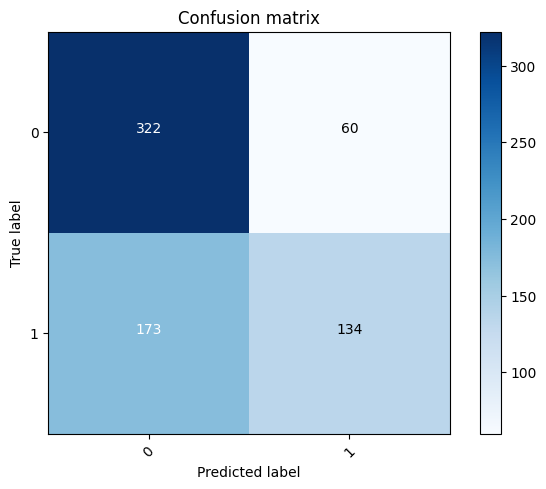

In [13]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred1_classes), ['0', '1'])

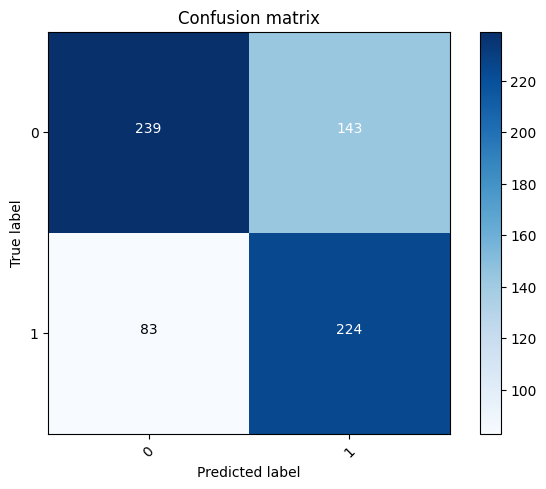

In [14]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred2_classes), ['0', '1'])

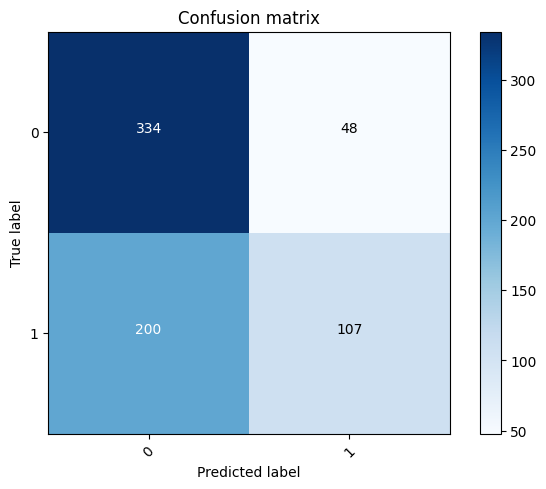

In [15]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred3_classes), ['0', '1'])

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [94]:
def get_threshold(df, target, proba, accuracy=0.65, step=0.01, add=True):

  recall = {}
  acc_list = []
  col = str(proba+'_t_class')
  
  for i in np.arange(0, 1 + step, step):
    df[col] = df[proba].apply(lambda x: 1 if x >= i else 0)
    acc_list.append(accuracy_score(df[target], df[col]))
    if accuracy_score(df[target], df[col]) >= accuracy:
      recall[round(i, len(str(step)) - 2)] = recall_score(df[target], df[col])

  if len(recall) != 0:
    max_recall = np.array(list(recall.values())).max()
    threshold = list(recall.keys())[list(recall.values()).index(max_recall)]

    df[col] = df[proba].apply(lambda x: 1 if x >= threshold else 0)
    acc = accuracy_score(df[target], df[col])

    if add == False:
      df.drop(col, axis=1, inplace=True)

    return 'Оптимальный порог = {}.\nRecall = {}.\nAccuracy = {}.{}'.format(
        threshold, round(max_recall, 3), round(acc, 3), (f'\nДобавлен столбец предсказанных классов \'{col}\'.' if add == True else ''))
    
  else:
    df.drop(col, axis=1, inplace=True)
    return 'Заданный уровень accuracy не достигнут.\nМаксимальный достигнутый accuracy = {}'.format(np.array(acc_list).max())

In [95]:
print('АЛГОРИТМ 1\n' + get_threshold(df, 'target', 'pred1_probs', step=0.01, add=True))
print()
print('АЛГОРИТМ 2\n' + get_threshold(df, 'target', 'pred2_probs', step=0.01, add=True))
print()
print('АЛГОРИТМ 3\n' + get_threshold(df, 'target', 'pred3_probs', step=0.01, add=True))

АЛГОРИТМ 1
Оптимальный порог = 0.36.
Recall = 0.743.
Accuracy = 0.652.
Добавлен столбец предсказанных классов 'pred1_probs_t_class'.

АЛГОРИТМ 2
Оптимальный порог = 0.27.
Recall = 0.837.
Accuracy = 0.675.
Добавлен столбец предсказанных классов 'pred2_probs_t_class'.

АЛГОРИТМ 3
Заданный уровень accuracy не достигнут.
Максимальный достигнутый accuracy = 0.6458635703918723


In [96]:
print('АЛГОРИТМ 3\n' + get_threshold(df, 'target', 'pred3_probs', accuracy=0.6458635703918723, step=0.01, add=True))

АЛГОРИТМ 3
Оптимальный порог = 0.26.
Recall = 0.609.
Accuracy = 0.646.
Добавлен столбец предсказанных классов 'pred3_probs_t_class'.


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

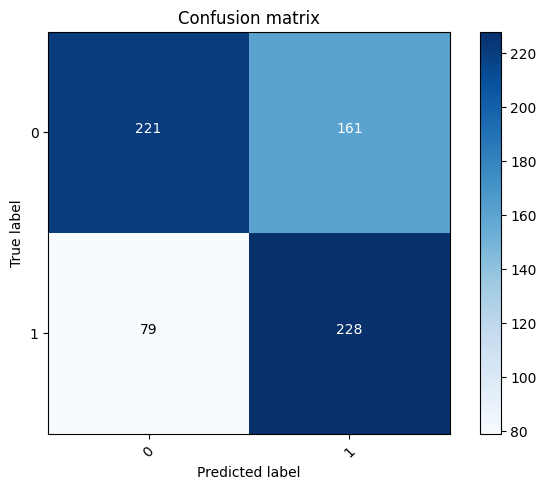

In [20]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred1_probs_t_class), ['0', '1'])

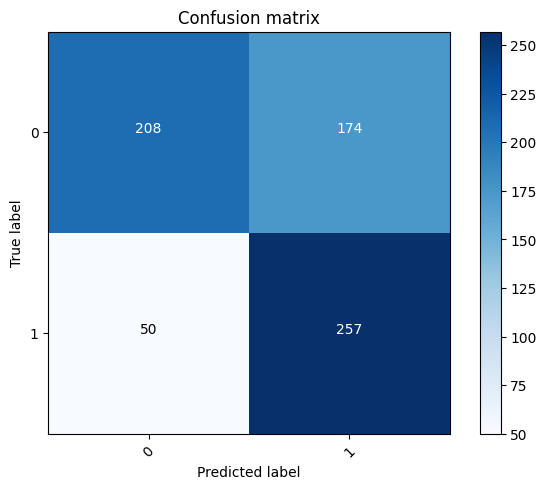

In [21]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred2_probs_t_class), ['0', '1'])

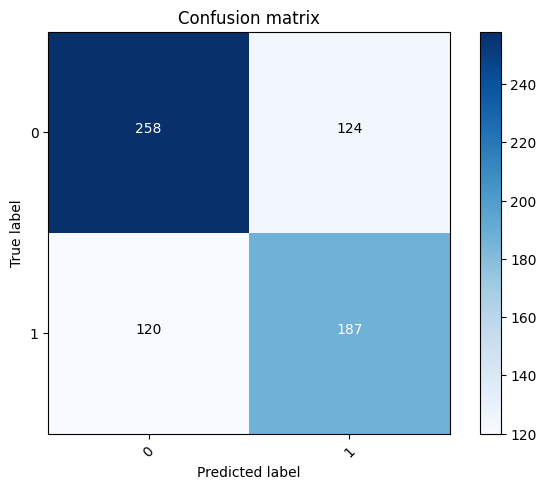

In [22]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred3_probs_t_class), ['0', '1'])

**Выводы:** Модель 2, у которой уже был самый высокий `recall`, лучше остальных справилась с этой задачей. В результате подбора порога у неё вырос `recall` на 10% и не снизился `accuracy`.

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [161]:
# Допилим функцию, чтобы она умела находить максимум разных метрик.

def get_threshold(df, target, proba, scoring=recall_score, scorer_average='binary', accuracy=0.65, step=0.01, add=True):

  score = {}
  acc_list = []
  col = str(proba+'_t_class')
  
  for i in np.arange(0, 1 + step, step):
    df[col] = df[proba].apply(lambda x: 1 if x >= i else 0)
    acc_list.append(accuracy_score(df[target], df[col]))
    if accuracy_score(df[target], df[col]) >= accuracy:
      score[round(i, len(str(step)) - 2)] = scoring(df[target], df[col], average=scorer_average)

  if len(score) != 0:
    max_score = np.array(list(score.values())).max()
    threshold = list(score.keys())[list(score.values()).index(max_score)]

    df[col] = df[proba].apply(lambda x: 1 if x >= threshold else 0)
    acc = accuracy_score(df[target], df[col])

    if add == False:
      df.drop(col, axis=1, inplace=True)

    return 'Оптимальный порог = {}.\n{} = {}. ({} average)\nAccuracy = {}.{}'.format(
        threshold, str(scoring).split(' ')[1], round(max_score, 3), scorer_average, round(acc, 3), (f'\nДобавлен столбец предсказанных классов \'{col}\'.' if add == True else ''))
    
  else:
    df.drop(col, axis=1, inplace=True)
    return 'Заданный уровень accuracy не достигнут.\nМаксимальный достигнутый accuracy = {}'.format(np.array(acc_list).max())

In [162]:
print('АЛГОРИТМ 1\n' + get_threshold(df, 'target', 'pred1_probs', scoring=precision_score, step=0.01, add=True))
print()
print('АЛГОРИТМ 2\n' + get_threshold(df, 'target', 'pred2_probs', scoring=precision_score, step=0.01, add=True))
print()
print('АЛГОРИТМ 3\n' + get_threshold(df, 'target', 'pred3_probs', scoring=precision_score, step=0.01, add=True))

АЛГОРИТМ 1
Оптимальный порог = 0.54.
precision_score = 0.737. (binary average)
Accuracy = 0.662.
Добавлен столбец предсказанных классов 'pred1_probs_t_class'.

АЛГОРИТМ 2
Оптимальный порог = 0.73.
precision_score = 0.837. (binary average)
Accuracy = 0.65.
Добавлен столбец предсказанных классов 'pred2_probs_t_class'.

АЛГОРИТМ 3
Заданный уровень accuracy не достигнут.
Максимальный достигнутый accuracy = 0.6458635703918723


In [163]:
print('АЛГОРИТМ 3\n' + get_threshold(df, 'target', 'pred3_probs', scoring=precision_score, accuracy=0.6458635703918723, step=0.01, add=True))

АЛГОРИТМ 3
Оптимальный порог = 0.4.
precision_score = 0.665. (binary average)
Accuracy = 0.646.
Добавлен столбец предсказанных классов 'pred3_probs_t_class'.


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

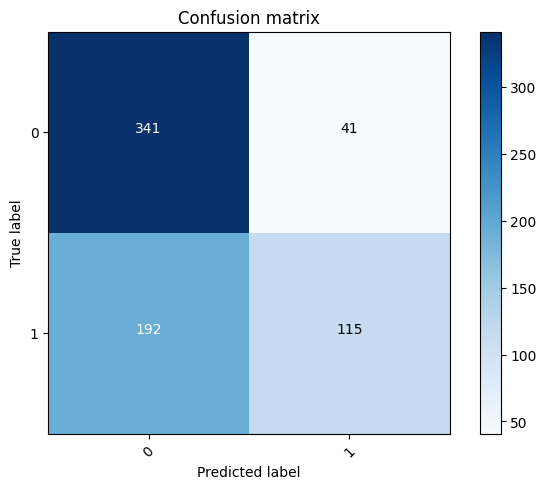

In [101]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred1_probs_t_class), ['0', '1'])

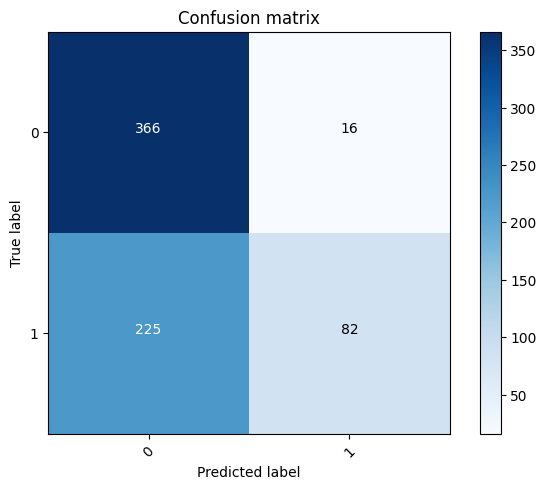

In [102]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred2_probs_t_class), ['0', '1'])

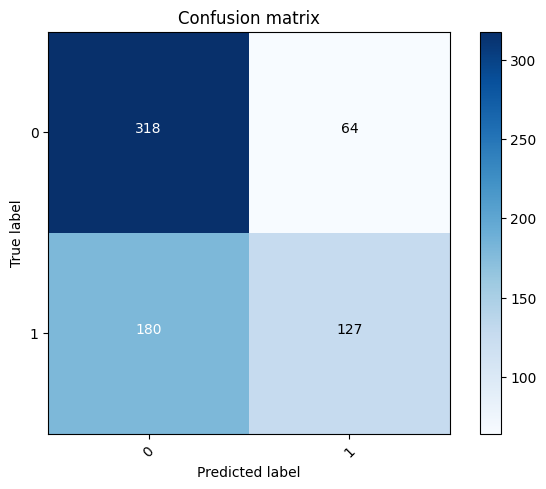

In [105]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred3_probs_t_class), ['0', '1'])

С этой задачей опять лучше всех справился второй алгоритм. Он выдаёт такой же максимум `precision`, что и `recall`, только на более высоком пороге.

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [164]:
print('АЛГОРИТМ 1\n' + get_threshold(df, 'target', 'pred1_probs', scoring=f1_score, step=0.01, add=True))
print()
print('АЛГОРИТМ 2\n' + get_threshold(df, 'target', 'pred2_probs', scoring=f1_score, step=0.01, add=True))
print()
print('АЛГОРИТМ 3\n' + get_threshold(df, 'target', 'pred3_probs', scoring=f1_score, step=0.01, add=True))

АЛГОРИТМ 1
Оптимальный порог = 0.36.
f1_score = 0.655. (binary average)
Accuracy = 0.652.
Добавлен столбец предсказанных классов 'pred1_probs_t_class'.

АЛГОРИТМ 2
Оптимальный порог = 0.32.
f1_score = 0.699. (binary average)
Accuracy = 0.685.
Добавлен столбец предсказанных классов 'pred2_probs_t_class'.

АЛГОРИТМ 3
Заданный уровень accuracy не достигнут.
Максимальный достигнутый accuracy = 0.6458635703918723


In [165]:
print('АЛГОРИТМ 3\n' + get_threshold(df, 'target', 'pred3_probs', scoring=f1_score, accuracy=0.6458635703918723, step=0.01, add=True))

АЛГОРИТМ 3
Оптимальный порог = 0.26.
f1_score = 0.605. (binary average)
Accuracy = 0.646.
Добавлен столбец предсказанных классов 'pred3_probs_t_class'.


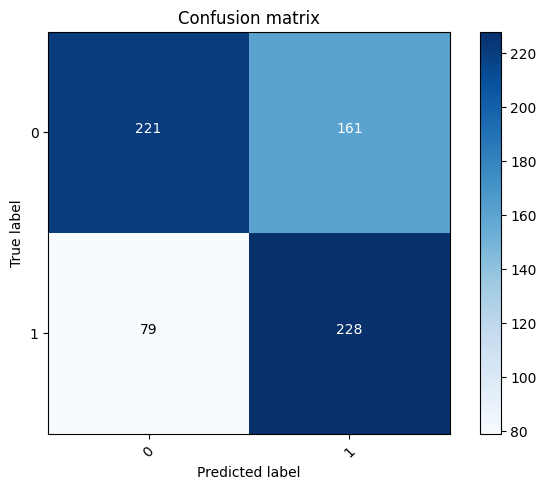

In [111]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred1_probs_t_class), ['0', '1'])

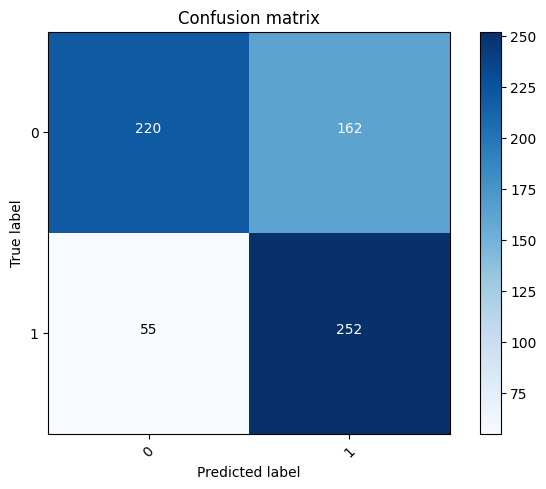

In [157]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred2_probs_t_class), ['0', '1'])

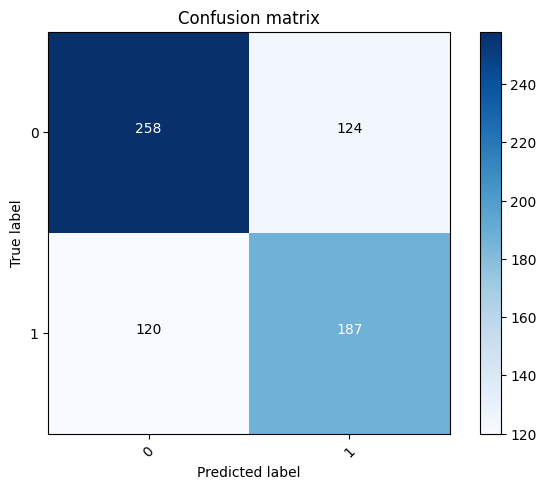

In [113]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred3_probs_t_class), ['0', '1'])

И снова наш лидер - алгоритм № 2.

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [190]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [247]:
X = df.loc[:, df.columns[0:14]]
y = df.target

In [209]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [248]:
p = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [249]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [250]:
print(classification_report(ytrain, p.predict(Xtrain)))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       277
           1       0.83      0.90      0.86       239

    accuracy                           0.87       516
   macro avg       0.87      0.87      0.87       516
weighted avg       0.87      0.87      0.87       516



In [251]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       105
           1       0.82      0.93      0.87        68

    accuracy                           0.89       173
   macro avg       0.88      0.90      0.89       173
weighted avg       0.90      0.89      0.89       173



Прямо очень хороший репорт. И на тесте показатели в среднем чуть-чуть лучше. Значит, модель не переобучена.

In [252]:
confusion_matrix(ytest, ypredict)

array([[91, 14],
       [ 5, 63]])

In [253]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'], cv=6)
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.8563310450038139
recall mean: 0.8662016088486677



{'fit_time': array([0.01392055, 0.00768685, 0.00800538, 0.01047659, 0.00827765,
        0.00739217]),
 'score_time': array([0.00425625, 0.00426435, 0.00386262, 0.00398207, 0.00381684,
        0.00368047]),
 'test_accuracy': array([0.88695652, 0.83478261, 0.82608696, 0.84347826, 0.87826087,
        0.86842105]),
 'test_recall': array([0.84313725, 0.8627451 , 0.82352941, 0.84313725, 0.94230769,
        0.88235294])}

In [260]:
# Подберём коэффициент регуляризации. Ловить будем обычный F1.

params = {'C': np.arange(0.25, 10.25, 0.25)}

gs= Pipeline([
    ('scaler', StandardScaler()),
    ('model', GridSearchCV(LogisticRegression(), params, scoring='f1', verbose=1, cv=6))
])

gs.fit(Xtrain, ytrain)

print('best score:', gs['model'].best_score_)
print('best params:', gs['model'].best_params_)

Fitting 6 folds for each of 40 candidates, totalling 240 fits
best score: 0.8522566462756908
best params: {'C': 0.25}


C = 0.25. На других метриках - такой же.

In [267]:
p = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=0.25))
])

In [268]:
p.fit(Xtrain, ytrain)
ypredict = p.predict(Xtest)

In [271]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       105
           1       0.82      0.93      0.87        68

    accuracy                           0.89       173
   macro avg       0.88      0.90      0.89       173
weighted avg       0.90      0.89      0.89       173



Отчёт такой же.

In [269]:
confusion_matrix(ytest, ypredict)

array([[91, 14],
       [ 5, 63]])

Матрица такая же.

In [270]:
cv = cross_validate(p, X, y, scoring=['accuracy', 'recall'], cv=6)
print('accuracy mean:', cv['test_accuracy'].mean())
print('recall mean:', cv['test_recall'].mean())
print()
cv

accuracy mean: 0.8621281464530893
recall mean: 0.8694695827048768



{'fit_time': array([0.01056957, 0.01115394, 0.01316381, 0.00806737, 0.00773692,
        0.00827622]),
 'score_time': array([0.0039506 , 0.00520492, 0.00488043, 0.00441146, 0.00400019,
        0.00420284]),
 'test_accuracy': array([0.89565217, 0.84347826, 0.83478261, 0.84347826, 0.88695652,
        0.86842105]),
 'test_recall': array([0.8627451 , 0.8627451 , 0.84313725, 0.82352941, 0.94230769,
        0.88235294])}

Кроссвалидация лучше. Оставим вариант с C=0.25.

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [283]:
df['pred4_probs'] = p.predict_proba(X)[:, 1]

In [285]:
print('АЛГОРИТМ 2\n' + get_threshold(df, 'target', 'pred2_probs', scoring=recall_score, accuracy=0.65, step=0.01, add=True))
print()
print('АЛГОРИТМ 4\n' + get_threshold(df, 'target', 'pred4_probs', scoring=recall_score, accuracy=0.65, step=0.01, add=True))

АЛГОРИТМ 2
Оптимальный порог = 0.27.
recall_score = 0.837. (binary average)
Accuracy = 0.675.
Добавлен столбец предсказанных классов 'pred2_probs_t_class'.

АЛГОРИТМ 4
Оптимальный порог = 0.07.
recall_score = 0.987. (binary average)
Accuracy = 0.669.
Добавлен столбец предсказанных классов 'pred4_probs_t_class'.


In [286]:
print(classification_report(df['target'],df['pred4_probs_t_class']))

              precision    recall  f1-score   support

           0       0.98      0.41      0.58       382
           1       0.57      0.99      0.73       307

    accuracy                           0.67       689
   macro avg       0.78      0.70      0.65       689
weighted avg       0.80      0.67      0.65       689



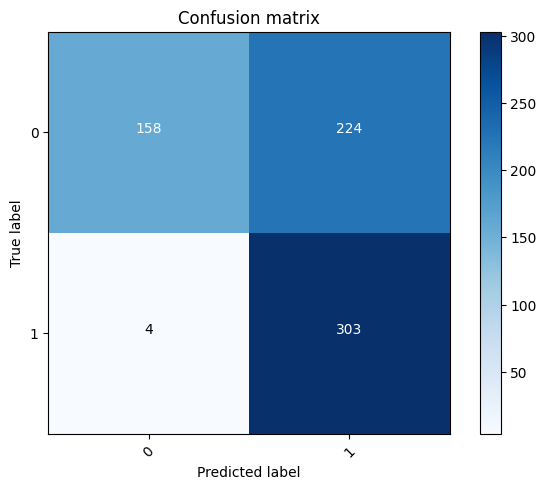

In [287]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred4_probs_t_class), ['0', '1'])

Наш алгоритм лучше максимизирует `recall`, чем предыдущий лидер, но при этом очень сильно ошибается на негативном классе.

In [288]:
print('АЛГОРИТМ 2\n' + get_threshold(df, 'target', 'pred2_probs', scoring=precision_score, accuracy=0.65, step=0.01, add=True))
print()
print('АЛГОРИТМ 4\n' + get_threshold(df, 'target', 'pred4_probs', scoring=precision_score, accuracy=0.65, step=0.01, add=True))

АЛГОРИТМ 2
Оптимальный порог = 0.73.
precision_score = 0.837. (binary average)
Accuracy = 0.65.
Добавлен столбец предсказанных классов 'pred2_probs_t_class'.

АЛГОРИТМ 4
Оптимальный порог = 0.88.
precision_score = 0.979. (binary average)
Accuracy = 0.753.
Добавлен столбец предсказанных классов 'pred4_probs_t_class'.


In [289]:
print(classification_report(df['target'],df['pred4_probs_t_class']))

              precision    recall  f1-score   support

           0       0.69      0.99      0.82       382
           1       0.98      0.46      0.62       307

    accuracy                           0.75       689
   macro avg       0.84      0.72      0.72       689
weighted avg       0.82      0.75      0.73       689



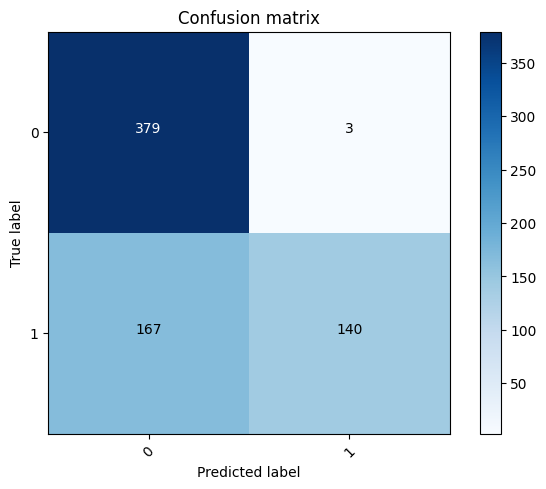

In [290]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred4_probs_t_class), ['0', '1'])

Зеркальная ситуация.

In [291]:
print('АЛГОРИТМ 2\n' + get_threshold(df, 'target', 'pred2_probs', scoring=f1_score, accuracy=0.65, step=0.01, add=True))
print()
print('АЛГОРИТМ 4\n' + get_threshold(df, 'target', 'pred4_probs', scoring=f1_score, accuracy=0.65, step=0.01, add=True))

АЛГОРИТМ 2
Оптимальный порог = 0.32.
f1_score = 0.699. (binary average)
Accuracy = 0.685.
Добавлен столбец предсказанных классов 'pred2_probs_t_class'.

АЛГОРИТМ 4
Оптимальный порог = 0.58.
f1_score = 0.868. (binary average)
Accuracy = 0.884.
Добавлен столбец предсказанных классов 'pred4_probs_t_class'.


In [292]:
print(classification_report(df['target'],df['pred4_probs_t_class']))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       382
           1       0.88      0.86      0.87       307

    accuracy                           0.88       689
   macro avg       0.88      0.88      0.88       689
weighted avg       0.88      0.88      0.88       689



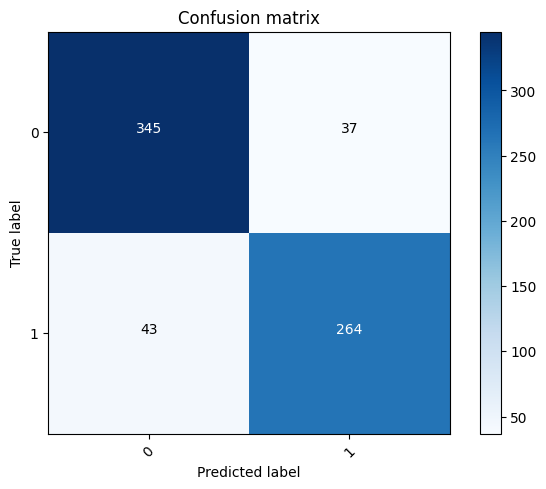

In [293]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred4_probs_t_class), ['0', '1'])

Однозначно лучший результат, но порог близок к порогу по умолчанию.

In [294]:
df.pred4_probs_t_class = df.pred4_probs.apply(lambda x: 1 if x >= 0.5 else 0)

In [298]:
print(classification_report(df['target'],df['pred4_probs_t_class']))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       382
           1       0.83      0.90      0.87       307

    accuracy                           0.88       689
   macro avg       0.87      0.88      0.87       689
weighted avg       0.88      0.88      0.88       689



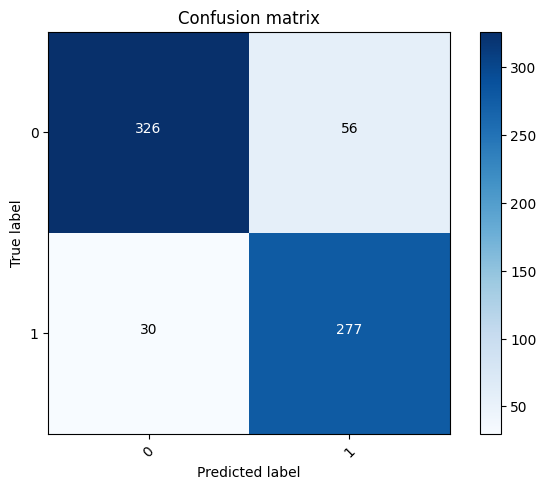

In [295]:
plot_confusion_matrix(confusion_matrix(df.target, df.pred4_probs_t_class), ['0', '1'])

Результат по умолчанию действительно близок к подобранному с предсказуемыми отличиями.

**Вывод**: построенная логистическая регрессия оказалась лучше алгоритмов 1-3. Особо стоит отметить её высокую чувствительость к выбору порога, что позволяет адаптировать её для разных задач.

# Бонус. Подбор порога для выбранной модели из Задачи 1.

In [317]:
df = pd.read_csv('/content/drive/MyDrive/ML_HW/Hometask4_v2/telecom_churn.csv')

In [318]:
df[['International plan', 'Voice mail plan']] = df[['International plan', 'Voice mail plan']].replace({'No': 0, 'Yes': 1})

In [319]:
df['Churn'] = df['Churn'].replace({False: 0, True: 1})

In [320]:
to_drop = ['Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Total eve calls', 'Total night calls', 'Area code']

df = df.drop(to_drop, axis=1)

In [321]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [360]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [364]:
p= Pipeline([
    ('target_encoder', TargetEncoder(cols='State')),
    ('poli', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=4.75))
])

p.fit(Xtrain, ytrain)
ypredict = p.predict(X)

In [365]:
print(classification_report(y, ypredict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.91      0.75      0.82       483

    accuracy                           0.95      3333
   macro avg       0.93      0.87      0.90      3333
weighted avg       0.95      0.95      0.95      3333



Если предсказывать стразу весь датасет, `recall` получается выше, чем только на трейне.

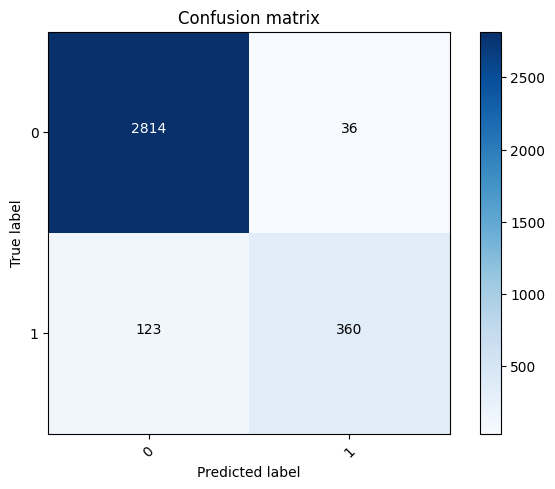

In [366]:
plot_confusion_matrix(confusion_matrix(y, ypredict), ['0', '1'])

In [367]:
df['logit_probs'] = p.predict_proba(X)[:, 1]

In [368]:
print('LOGIT\n' + get_threshold(df, 'Churn', 'logit_probs', scoring=recall_score, accuracy=0.94, step=0.01, add=True))

LOGIT
Оптимальный порог = 0.27.
recall_score = 0.83. (binary average)
Accuracy = 0.941.
Добавлен столбец предсказанных классов 'logit_probs_t_class'.


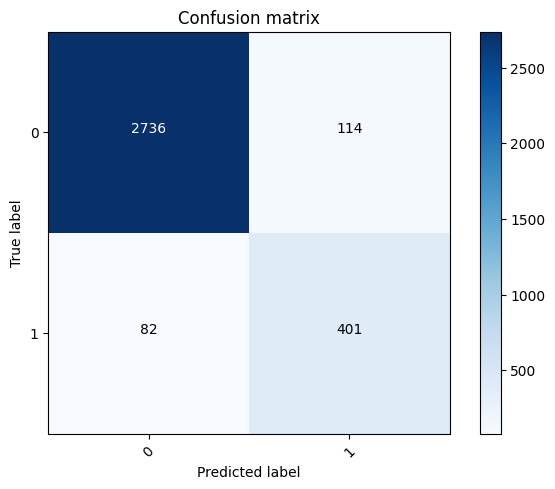

In [369]:
plot_confusion_matrix(confusion_matrix(df.Churn, df.logit_probs_t_class), ['0', '1'])

Подбор порога позволяет установить баланс между полнотой и ошибкой на негативном классе.